Introduccion

In [3]:
# cargar librerias
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
# !pip install pysentimiento
# !pip install unidecode 
import pandas as pd
import re
from pysentimiento import create_analyzer
from pysentimiento.preprocessing import preprocess_tweet
from unidecode import unidecode
from nltk.corpus import stopwords
import nltk
#import nltk


c:\Users\icm2363a\AppData\Local\Programs\Python\Python311\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


### Cargue de archivo 

In [5]:
#Cargamos los datos
data = pd.read_csv("gestionrecaudo.csv", sep=',') 

df = pd.DataFrame(data)

# Convertir la columna 'fechaenvio' a tipo datetime
df['fecha'] = pd.to_datetime(df['fechaidealpago'], format="%Y-%m-%d %H:%M:%S", errors='coerce')
df.head(3)

,CodigoPrograma,fechaenvio,fechaidealpago,mensaje,estado,comentario,fecha
0,56,1900-01-01 00:00:00,2020-07-07 00:00:00,NaN,Exitosa,Gestión de recaudo exitosa,2020-07-07
1,56,2020-08-15 05:00:00,2020-07-07 00:00:00,"linea personal no esta en uso, linea Alterna n...",Fallido,Gestión de recaudo no exitosa,2020-07-07
2,56,1900-01-01 00:00:00,2020-07-07 00:00:00,NaN,Inactivo,Gestión no ejecutada para el día planeado,2020-07-07


In [6]:
# Filtrar observaciones mayores iguales al año 2022
df_2022 = df[df['fecha'].dt.year >= 2022]
df_2022.head(2)

,CodigoPrograma,fechaenvio,fechaidealpago,mensaje,estado,comentario,fecha
103,75,1900-01-01 00:00:00,2022-04-06 00:00:00,NaN,Exitosa,Gestión de recaudo exitosa,2022-04-06
104,75,1900-01-01 00:00:00,2022-04-06 00:00:00,NaN,Inactivo,Gestión no ejecutada para el día planeado,2022-04-06


In [7]:
#Cargamos los datos
data_o = pd.read_csv("observaciones.csv", sep=',') 
data_o.head(3)

,0,CodigoPrograma,fecha,empleado,observacion
0,0,56,2020-05-18,Jennifer Paola Escobar Pachon,"Teleman, no contestan"
1,1,56,2020-06-19,Alejandra Andrea Gallego Cardona,Tlm. lineas no funcionan se programa visita.
2,2,56,2020-06-24,Alejandra Andrea Gallego Cardona,"Tlm, en linea Alterna se deja msj con la Sr Olga."


In [8]:
dfo = pd.DataFrame(data_o)

# Convertir la columna 'fechaenvio' a tipo datetime
dfo['fecha'] = pd.to_datetime(df['fecha'], format="%Y-%m-%d")

In [9]:
# Filtrar observaciones mayores iguales al año 2022
dfo_2022 = dfo[dfo['fecha'].dt.year >= 2022]

In [10]:
data1=(df_2022[['CodigoPrograma','estado','comentario','fecha']])
data1.head(2)

,CodigoPrograma,estado,comentario,fecha
103,75,Exitosa,Gestión de recaudo exitosa,2022-04-06
104,75,Inactivo,Gestión no ejecutada para el día planeado,2022-04-06


In [11]:
data2=(dfo_2022[['CodigoPrograma','observacion','fecha']])
data2.head(2)

,CodigoPrograma,observacion,fecha
103,84,"Teleman, el papá de la tt dice que despues del...",2022-04-06
104,84,TT indica que a fin de mes se pondrá al día,2022-04-06


### Informacion del archivo a procesar --> vamos analizar observaciones

In [12]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 57124 entries, 103 to 238351
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   CodigoPrograma  57124 non-null  int64         
 1   observacion     57124 non-null  object        
 2   fecha           57124 non-null  datetime64[ns]
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 1.7+ MB


In [13]:
# tamaño dataframe
data2.shape

(57124, 3)

Analisis Data 2 --> Observaciones

In [14]:
#Concatenamos todos los textos
texto=data2
texto.head(4)

,CodigoPrograma,observacion,fecha
103,84,"Teleman, el papá de la tt dice que despues del...",2022-04-06
104,84,TT indica que a fin de mes se pondrá al día,2022-04-06
105,84,teleman. en llama contesta el sr Luis papa de ...,2022-08-06
108,84,teleman. pendiente pago a fin de mes,2022-07-30


### Definiciones

## definicion de todas los metodos de limpieza y arreglos

**PQUETE WORLDCLOUD**

In [15]:
#Cargamos librerías de NLP
from wordcloud import WordCloud
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\icm2363a\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

Inicio

In [16]:
# Aumentar Capacitada del sistema
import sys
sys.setrecursionlimit(30000)

In [17]:
#Data Manipulation
import os
import zipfile
import pandas as pd
import numpy as np

#Visualization
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import plotly.express as px

#Models
from sklearn import preprocessing
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn.neighbors import DistanceMetric
from sklearn.neighbors import kneighbors_graph


### NLTK
import nltk # Procesamiento del lenguaje natural
nltk.download('averaged_perceptron_tagger') # Etiquetar las palabras
nltk.download('vader_lexicon') # Analisis de sentimiento
nltk.download('wordnet') # Categorizacion de las palabras
nltk.download('stopwords') # Quitar palabras comunes
from nltk.corpus import wordnet
from nltk import pos_tag # Clasificacion de palabras
from nltk.corpus import stopwords # Eliminar palabras vacias
from nltk.tokenize import WhitespaceTokenizer # Tokenizar
from nltk.stem import WordNetLemmatizer # Lematizar
from nltk.stem.wordnet import WordNetLemmatizer # Lematizar
from nltk.sentiment.vader import SentimentIntensityAnalyzer # Analisis de sentimiento

### TRATAMIENTO DE TEXTO
from wordcloud import WordCloud # Nube de palabras
import string # Operaciones de cadenas de caracteres
from textblob import TextBlob # Procesamiento del lenguaje

### SKLEARN
from sklearn.feature_extraction.text import TfidfVectorizer # Codificacion de documentos, segun frecuenca de las palabras
from sklearn.model_selection import train_test_split # Dividir los datos en entrenamiento y validacion
from imblearn.over_sampling import SMOTE # Balanceo de los datos
from sklearn.linear_model import LogisticRegression # Clasificador
from sklearn.ensemble import RandomForestClassifier # Clasificador
from sklearn.metrics import classification_report # Metricas para valoracion del modelo
from sklearn.metrics import f1_score, confusion_matrix # Metricas para valoracion del modelo
from sklearn.metrics import roc_curve, auc, roc_auc_score # Metricas para valoracion del modelo
#from sklearn.metrics import plot_confusion_matrix # Metricas para valoracion del modelo
from sklearn.model_selection import GridSearchCV # Ajuste de hiper-parametros

import pickle # Guardar modelo

import pandas as pd
import string
import re
import spacy
from textblob import TextBlob
from nltk.corpus import stopwords
from nltk import pos_tag
from nltk.corpus import wordnet
from nltk.stem import WordNetLemmatizer


### ADICIONALES
import warnings # Control de advertencias
warnings.filterwarnings('ignore')
from tqdm import tqdm 
tqdm.pandas(desc='Processing Dataframe') # Barra de progreso

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\icm2363a\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\icm2363a\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\icm2363a\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\icm2363a\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [18]:
#nltk.download('stopwords')
def clean_txt(text):
    text = text.lower()
    # Removes all mentions (@username) from the tweet since it is of no use to us
    text = re.sub(r'(@[A-Za-z0-9_]+)', '', text)
    
    # Removes any link in the text
    text = re.sub('http://\S+|https://\S+', '', text)

    # Only considers the part of the string with char between a to z or digits and whitespace characters
    # Basically removes punctuation
    text = re.sub(r'[^\w\s]', '', text)

    text = re.sub(r'\n', '', text)
    # Removes stop words that have no use in sentiment analysis 

    text = ''.join(text)
    text = unidecode(text)
    text = preprocess_tweet(text)
    return text

def process_text(df, stop, busqueda):
    df['txt'] = df['text'].apply(lambda x: ' '.join([word for word in x.split() if word not in (busqueda)]))
    df['txt'] = df['txt'].apply(clean_txt)
    df['txt'] = df['txt'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))
    return df

def procesamiento_total(df, stop, busqueda):
    df= process_text(df, stop, busqueda)
    df = analizar_texto(df)
    return df
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\icm2363a\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [19]:
import nltk
nltk.download('stopwords')

stop_words = list(set(stopwords.words('spanish')))
wordnet_lemmatizer = WordNetLemmatizer()
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\icm2363a\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\icm2363a\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\icm2363a\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [20]:

# Función para limpiar el texto
def limpiar_texto(texto):
    # Poner el texto en minúsculas
    texto = texto.lower()
    # Tokenizar el texto y quitar los signos de puntuación
    texto = [word.strip(string.punctuation) for word in texto.split(" ")]
    # Quitar las palabras que contengan números
    texto = [word for word in texto if not any(c.isdigit() for c in word)]
    # Quitar las stop words
    stop = stopwords.words('spanish')
    texto = [x for x in texto if x not in stop]
    # Quitar los tokens vacíos
    texto = [t for t in texto if len(t) > 0]
    # Etiquetado de nombres, verbos, adjetivos o adverbios
    pos_tags = pos_tag(texto)
    texto = [get_wordnet_pos(t[1]) for t in pos_tags]
    return texto

# Etiquetado de nombres, verbos, adjetivos o adverbios
def get_wordnet_pos(pos_tag):
    if pos_tag.startswith('J'):
        return wordnet.ADJ
    elif pos_tag.startswith('V'):
        return wordnet.VERB
    elif pos_tag.startswith('N'):
        return wordnet.NOUN
    elif pos_tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN

# Función para limpiar y etiquetar POS en un DataFrame
def limpiar_etiquetar_pos(df):
    df['txt'] = df['txt'].apply(remove_symbols)
    df['txt'] = df['txt'].apply(eliminar_digitos_caracteres)
    df['txt'] = df['txt'].apply(limpiar_texto)
    return df

# Función para realizar el análisis de sentimientos en un DataFrame
def analizar_texto(df):
    df['Sentiment'] = df['txt'].apply(analisis_sentimiento)
    return df

# Función para eliminar dígitos y caracteres especiales
def eliminar_digitos_caracteres(texto):
    pattern = r'[0-9.,*\!|\'\?]' # se le agrego . y * para eliminar caracteres especiales
    texto = re.sub(pattern, '', texto)
    return texto

In [21]:
# remover simbolos
symbols = [
    '¿','?','~','`','!','¡','@','#','$','%','^',
    '*','(',')','_','-','+','=','{','}','[',
    ']','\\',':',';','<','>','/', '.', ',','&','\n'
    ,'\r','\t', '|', '“', '"', '–', '”', '©', '-', '—',
    '…', ';', '‘','’'
]

import re

def remove_symbols (text) -> str:
    res = text
    for char in symbols:
        res = res.replace(char, '')
    return res


In [22]:
#Función para eliminar dígitos
#Expresiones regulares
import re
#Función para eliminar dígitos
def eliminar_digitos( text ):
    pattern = r'[0-9.,' '*"\!|\'|\?]' # se le agrego . y * para eliminar caracteres especiales
    text = re.sub( pattern, '', text )
    # re.sub("\!|\'|\?","",string)
    return text

In [23]:
#Tokenizar el texto
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist

#Bi-gramas
from nltk import bigrams
#Tri-gramas
from nltk.util import ngrams

In [24]:
#Convertir a minuscula, limpiar y tokenizar
from nltk.tokenize import word_tokenize

def tokenizar(review_clean):
  tokens = word_tokenize(review_clean)
  words = [w.lower() for w in tokens if w.isalnum()]
  return words

In [25]:
from nltk.corpus import stopwords
stoplist = stopwords.words('spanish') + ['though']

In [26]:
#Eliminamos stopwords y otras palabras
from nltk.corpus import stopwords

sw= stopwords.words('spanish')
sw.append("https") #adiciona nuevas palabras a la lista de stopwords

def limpiar_stopwords(lista):
  clean_token = lista[:]
  for token in lista:
    if token in sw:
      clean_token.remove(token)
  return clean_token

In [27]:
#Reducción a lematizacion 
# muy demorado

def lemma_tokens( lista ):
  text=' '.join(map(str, lista)) #se requiere un string, no una lista
  lemma = []
  for token in nlp( text ):
      lemma.append( token.lemma_ )
  return lemma

In [28]:
import spacy

# Descargar y cargar el modelo preentrenado para el procesamiento del lenguaje español
# !python -m spacy download es_core_news_sm
nlp = spacy.load("es_core_news_sm")

# Crear un documento con una frase para lematizar
doc = nlp("Esto es una frase.")

# Imprimir cada palabra lematizada junto con su parte de discurso
lemmatized_words = [(token.text, token.lemma_, token.pos_) for token in doc]

In [29]:
#Reducción a la raíz (Stemming) en spanish
from nltk.stem import SnowballStemmer
stemmer = SnowballStemmer('spanish')

def stem_tokens(lista):
  lista_stem = []
  for token in lista:
    lista_stem.append(stemmer.stem(token))
  return lista_stem

Empieza la limpieza y analisis  --> Datos2

In [30]:
texto.head(2)

,CodigoPrograma,observacion,fecha
103,84,"Teleman, el papá de la tt dice que despues del...",2022-04-06
104,84,TT indica que a fin de mes se pondrá al día,2022-04-06


In [31]:
# limpiar simbolos
# text = texto[['observacion']]
#text = remove_symbols(text)
texto["observacion_clean"] = texto["observacion"].progress_apply(lambda x: clean_txt(x))
texto["observacion_clean"] = texto["observacion"].progress_apply(lambda x: remove_symbols(x))

Processing Dataframe:   2%|▏         | 859/57124 [00:00<00:13, 4299.23it/s]

Processing Dataframe: 100%|██████████| 57124/57124 [00:00<00:00, 63395.46it/s]


In [32]:
#modificar el no
#text["observacion_limpia"] = text["observacion_clean"].apply(lambda x: x.replace("no ", "no"))
texto["observacion_clean"] = texto["observacion_clean"].progress_apply(lambda x: x.replace("á", "a"))
texto["observacion_clean"] = texto["observacion_clean"].progress_apply(lambda x: x.replace("é", "e"))
texto["observacion_clean"] = texto["observacion_clean"].progress_apply(lambda x: x.replace("í", "i"))
texto["observacion_clean"] = texto["observacion_clean"].progress_apply(lambda x: x.replace("ó", "o"))
texto["observacion_clean"] = texto["observacion_clean"].progress_apply(lambda x: x.replace("ú", "u"))
texto.head(2)

Processing Dataframe:  42%|████▏     | 23958/57124 [00:00<00:00, 238011.76it/s]

Processing Dataframe: 100%|██████████| 57124/57124 [00:00<00:00, 603031.88it/s]


,CodigoPrograma,observacion,fecha,observacion_clean
103,84,"Teleman, el papá de la tt dice que despues del...",2022-04-06,Teleman el papa de la tt dice que despues del ...
104,84,TT indica que a fin de mes se pondrá al día,2022-04-06,TT indica que a fin de mes se pondra al dia


In [33]:
# clean text -  eliminar_digitos
texto["observacion_limpia"] = texto["observacion_clean"].progress_apply(lambda x: eliminar_digitos(x))

Processing Dataframe: 100%|██████████| 57124/57124 [00:00<00:00, 86447.98it/s] 


In [34]:
# eliminar compañia 
texto["observacion_limpia"] = texto["observacion_limpia"].progress_apply(lambda x: x.replace("teleman", "").replace("Tlm ", ""))
texto["observacion_limpia"] = texto["observacion_limpia"].progress_apply(lambda x: x.replace("Teleman ", "").replace("tlm", ""))
texto["observacion_limpia"] = texto["observacion_limpia"].progress_apply(lambda x: x.replace("tt", "").replace("dtype", ""))
texto["observacion_limpia"] = texto["observacion_limpia"].progress_apply(lambda x: x.replace("nc", "").replace("object", ""))
texto["observacion_limpia"] = texto["observacion_limpia"].progress_apply(lambda x: x.replace("length", "").replace("Length", ""))
texto["observacion_limpia"] = texto["observacion_limpia"].progress_apply(lambda x: x.replace("ñ", "n").replace("Ñ", "n"))
texto["observacion_limpia"] = texto["observacion_limpia"].progress_apply(lambda x: x.replace("nc ", "").replace("ÑC", ""))
texto["observacion_limpia"] = texto["observacion_limpia"].progress_apply(lambda x: x.replace("ñ", "n").replace("Ñ", "n"))
texto["observacion_limpia"] = texto["observacion_limpia"].progress_apply(lambda x: x.replace("nc ", "").replace("ÑC", ""))
texto["observacion_limpia"] = texto["observacion_limpia"].progress_apply(lambda x: x.replace("TT ", ""))

Processing Dataframe: 100%|██████████| 57124/57124 [00:00<00:00, 473708.15it/s]


In [35]:
# # add number of characters column
# text["nb_chars"] = text["observacion_limpia"].apply(lambda x: len(x))

# add number of words column
texto["nb_words"] = texto["observacion_limpia"].progress_apply(lambda x: len(x.split(" ")))
texto.head(4)

Processing Dataframe: 100%|██████████| 57124/57124 [00:00<00:00, 189782.76it/s]


,CodigoPrograma,observacion,fecha,observacion_clean,observacion_limpia,nb_words
103,84,"Teleman, el papá de la tt dice que despues del...",2022-04-06,Teleman el papa de la tt dice que despues del ...,el papa de la dice que despues del que les p...,29
104,84,TT indica que a fin de mes se pondrá al día,2022-04-06,TT indica que a fin de mes se pondra al dia,indica que a fin de mes se pondra al dia,10
105,84,teleman. en llama contesta el sr Luis papa de ...,2022-08-06,teleman en llama contesta el sr Luis papa de l...,en llama contesta el sr Luis papa de la info...,31
108,84,teleman. pendiente pago a fin de mes,2022-07-30,teleman pendiente pago a fin de mes,pendiente pago a fin de mes,7


## analisis de sentimientos

In [36]:
clase_mayoritaria = texto[texto["nb_words"] > 1]
clase_mayoritaria.head(3)

,CodigoPrograma,observacion,fecha,observacion_clean,observacion_limpia,nb_words
103,84,"Teleman, el papá de la tt dice que despues del...",2022-04-06,Teleman el papa de la tt dice que despues del ...,el papa de la dice que despues del que les p...,29
104,84,TT indica que a fin de mes se pondrá al día,2022-04-06,TT indica que a fin de mes se pondra al dia,indica que a fin de mes se pondra al dia,10
105,84,teleman. en llama contesta el sr Luis papa de ...,2022-08-06,teleman en llama contesta el sr Luis papa de l...,en llama contesta el sr Luis papa de la info...,31


In [37]:
stop = stopwords.words('spanish')

In [38]:
def clasificar_texto(df):
    analyzer = SentimentIntensityAnalyzer()
    df['sentiment_scores'] = df['txt'].apply(lambda x: analyzer.polarity_scores(x))
    df[['negativo', 'neutro', 'positivo']] = pd.DataFrame(df['sentiment_scores'].tolist(), index=df.index)
    df['Sentiment'] = df[['negativo', 'neutro', 'positivo']].idxmax(axis=1)
    df.drop(columns=['sentiment_scores'], inplace=True)
    return df    

In [39]:
def procesamiento(df):
    df = analizar_texto(df)
    return df
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\icm2363a\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [40]:
# Descargar los recursos necesarios para nltk
nltk.download('punkt')
nltk.download('stopwords')

# Definir la función para eliminar nombres de personas
def eliminar_nombres(texto):
    # Definir un patrón para identificar nombres de personas
    patron_nombres = r'\b[A-Z][a-z]+\b'

    # Convertir la lista de palabras en una cadena de texto
    texto = ' '.join(texto)

    # Buscar y reemplazar los nombres de personas en el texto con una cadena vacía
    texto_sin_personas = re.sub(patron_nombres, '', texto)

    return texto_sin_personas



[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\icm2363a\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\icm2363a\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [41]:
clase_mayoritaria["observacion_sin_nombres"] = texto["observacion_limpia"].progress_apply(lambda x: eliminar_digitos(x))

Processing Dataframe: 100%|██████████| 57124/57124 [00:00<00:00, 116257.95it/s]


In [42]:
analizador = SentimentIntensityAnalyzer()
clase_mayoritaria["Sentimiento"] = clase_mayoritaria["observacion_sin_nombres"].progress_apply(lambda x: analizador.polarity_scores(x))
clase_mayoritaria = pd.concat([clase_mayoritaria.drop(['Sentimiento'], axis=1), clase_mayoritaria['Sentimiento'].progress_apply(pd.Series)], axis=1)

Processing Dataframe:   0%|          | 211/56879 [00:00<00:27, 2094.68it/s]

Processing Dataframe: 100%|██████████| 56879/56879 [00:16<00:00, 3456.19it/s]


In [43]:
clase_mayoritaria.head(2)

,CodigoPrograma,observacion,fecha,observacion_clean,observacion_limpia,nb_words,observacion_sin_nombres,neg,neu,pos,compound
103,84,"Teleman, el papá de la tt dice que despues del...",2022-04-06,Teleman el papa de la tt dice que despues del ...,el papa de la dice que despues del que les p...,29,el papa de la dice que despues del que les p...,0.0,1.0,0.0,0.0
104,84,TT indica que a fin de mes se pondrá al día,2022-04-06,TT indica que a fin de mes se pondra al dia,indica que a fin de mes se pondra al dia,10,indica que a fin de mes se pondra al dia,0.0,1.0,0.0,0.0


## Nube de Palabras

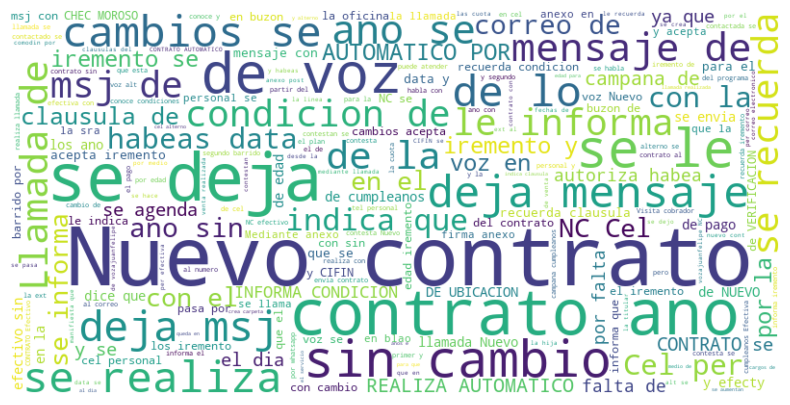

In [44]:
def show_wordcloud(text):
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.show()

show_wordcloud(clase_mayoritaria['observacion_sin_nombres'].str.cat(sep=' '))

In [45]:
#Convertir a minuscula, limpiar y tokenizar
from nltk.tokenize import word_tokenize

def tokenizar(review_clean):
  tokens = word_tokenize(review_clean)
  words = [w.lower() for w in tokens if w.isalnum()]
  return words

In [46]:
data_prueba = (clase_mayoritaria[['CodigoPrograma','observacion_sin_nombres','fecha','neg','neu','pos','compound']])

# modificar el NO para agregarlo a la palabra siguiente
# Reemplazar el espacio entre "no" y "contestan" por "nocontestan" en la columna 'observacion_sin_personas'
data_prueba['observacion_no'] = data_prueba['observacion_sin_nombres'].str.replace('no ', 'no')
data_prueba['observacion_minuscula'] = data_prueba['observacion_no'].str.lower()
data_prueba.head(3)

,CodigoPrograma,observacion_sin_nombres,fecha,neg,neu,pos,compound,observacion_no,observacion_minuscula
103,84,el papa de la dice que despues del que les p...,2022-04-06,0.0,1.0,0.0,0.0,el papa de la dice que despues del que les p...,el papa de la dice que despues del que les p...
104,84,indica que a fin de mes se pondra al dia,2022-04-06,0.0,1.0,0.0,0.0,indica que a fin de mes se pondra al dia,indica que a fin de mes se pondra al dia
105,84,en llama contesta el sr Luis papa de la info...,2022-08-06,0.0,1.0,0.0,0.0,en llama contesta el sr Luis papa de la info...,en llama contesta el sr luis papa de la info...


In [47]:
# Obtener las stopwords en español
spanish_stopwords = set(stopwords.words('spanish'))

# Agregar "no" a las stopwords para evitar su eliminación
spanish_stopwords.discard('no')

# Ejemplo de DataFrame clase_mayoritaria
# clase_mayoritaria = pd.DataFrame({'observacion_limpia': ['no me gusta ir al cine pero no tengo otro plan',
#                                                         'hoy es un buen día para salir a pasear']})

# Función para filtrar stopwords, palabras de tamaño 2 o menos y contar frecuencia de palabras
def filtrar_y_contar_palabras(texto):
    tokens = word_tokenize(texto)
    palabras_filtradas = [token for token in tokens if (len(token) > 2 or token.lower() == 'no') and token.lower() not in spanish_stopwords]
    return palabras_filtradas

# Aplicar el filtrado de stopwords al DataFrame clase_mayoritaria
data_prueba['observacion_filtrada'] = data_prueba['observacion_minuscula'].progress_apply(filtrar_y_contar_palabras)

# Contar frecuencia de palabras filtradas
palabras_filtradas = [word for sublist in data_prueba['observacion_filtrada'] for word in sublist]


Processing Dataframe: 100%|██████████| 56879/56879 [00:13<00:00, 4180.98it/s]


Quitar Stopward

### Analisis de Ngramas

In [48]:
# # Supongamos que tienes un DataFrame clase_mayoritaria con una columna 'observacion_limpia'

# # Definir la función para obtener los n-gramas
# def get_ngrams(text, n):
#     tokens = text.split()
#     n_grams = ngrams(tokens, n)
#     return [' '.join(gram) for gram in n_grams]

# # Aplicar la función a la columna 'observacion_limpia' y guardar los resultados en nuevas columnas 'bigramas' y 'trigramas'
# data_prueba['trigramas'] = data_prueba['observacion_minuscula'].apply(lambda x: get_ngrams(x, 3))

# # Calcular la frecuencia de aparición de los trigramas
# trigram_fdist = FreqDist([gram for sublist in data_prueba['trigramas'] for gram in sublist])

# # Obtener los trigramas más comunes y su frecuencia
# most_common_trigrams = trigram_fdist.most_common(20)

# # Convertir los trigramas y su frecuencia en un DataFrame para graficar
# df_trigrams = pd.DataFrame(most_common_trigrams, columns=['Trigrama', 'Frecuencia'])

# # Filtrar los trigramas que aparecen más de 20 veces
# clase_mayoritaria_trigrams = df_trigrams[df_trigrams['Frecuencia'] > 20]

# # Graficar los trigramas más comunes
# plt.figure(figsize=(10, 6))
# plt.bar(df_trigrams['Trigrama'], df_trigrams['Frecuencia'])
# plt.xticks(rotation=45, ha='right')
# plt.xlabel('Trigrama')
# plt.ylabel('Frecuencia')
# plt.title('Trigramas más comunes')
# plt.show()


se empieza nuevamnete la tokenizacion

In [49]:
# Limpiamos los tokens
data_prueba['sin_stopwords'] = data_prueba['observacion_filtrada'].progress_apply(lambda x: limpiar_stopwords(x))


Processing Dataframe: 100%|██████████| 56879/56879 [00:04<00:00, 12172.91it/s]


In [50]:
# Lematizacion
# demorado
data_prueba['lemmatization'] = data_prueba['sin_stopwords'].progress_apply(lambda x: lemma_tokens(x))


Processing Dataframe: 100%|██████████| 56879/56879 [07:56<00:00, 119.40it/s]


In [51]:
# stemming
data_prueba['stemming'] = data_prueba['sin_stopwords'].progress_apply(lambda x: stem_tokens(x))

Processing Dataframe: 100%|██████████| 56879/56879 [00:15<00:00, 3762.50it/s]


In [52]:
df2a=data_prueba
#df3a=df5

In [53]:
#guardar datos 
df2a.to_csv("df2a.csv",index=False,sep=';')
# clase_mayoritaria_trigrams.to_csv("clase_mayoritaria_trigrams.csv",index=False,sep=';')

modelamiento

In [54]:
# Agrupar por nb_words y realizar operaciones de suma y promedio en las columnas neg, neu, pos, compound
grouped = df2a.groupby("CodigoPrograma").agg({"neg": ["sum", "mean"], "neu": ["sum", "mean"], "pos": ["sum", "mean"], "compound": ["sum", "mean"]})
# Resetear el índice del DataFrame
grouped_df_reset = grouped.reset_index()

grouped_df = pd.DataFrame(grouped_df_reset)

# Función para generar los nombres de las columnas a partir del índice multi-nivel
def generate_column_names(columns):
    return [f"{col[1]}_{col[0]}" for col in columns]

# Aplicar la función de generación de nombres de columnas al DataFrame agrupado
grouped_df.columns = generate_column_names(grouped_df.columns)
grouped_dfinal = grouped_df
grouped_dfinal.head(2)


,_CodigoPrograma,sum_neg,mean_neg,sum_neu,mean_neu,sum_pos,mean_pos,sum_compound,mean_compound
0,64,0.0,0.0,2.0,1.0,0.0,0.0,0.0,0.0
1,84,0.0,0.0,4.0,1.0,0.0,0.0,0.0,0.0


In [55]:
# Función para interpretar el sentimiento
def interpretar_sentimiento(row):
    if row["mean_neg"] > row["mean_pos"]:
        return "Negativo"
    elif row["mean_pos"] > row["mean_neg"]:
        return "Positivo"
    else:
        return "Neutro"

# Aplicar la función al DataFrame y crear una nueva columna "sentimiento"
grouped_dfinal["sentimiento"] = grouped_dfinal.progress_apply(interpretar_sentimiento, axis=1)
# Agregar la columna de sentimiento basada en mean_compound
grouped_dfinal["sentimiento_1"] = grouped_dfinal["mean_compound"].progress_apply(lambda x: "Negativo" if x < -0.45 else "Positivo")
grouped_dfinal.head(3)

Processing Dataframe: 100%|██████████| 11371/11371 [00:00<00:00, 1605298.92it/s]


,_CodigoPrograma,sum_neg,mean_neg,sum_neu,mean_neu,sum_pos,mean_pos,sum_compound,mean_compound,sentimiento,sentimiento_1
0,64,0.000,0.000000,2.000,1.00000,0.000,0.000000,0.0000,0.00000,Neutro,Positivo
1,84,0.000,0.000000,4.000,1.00000,0.000,0.000000,0.0000,0.00000,Neutro,Positivo
2,108,1.154,0.072125,14.628,0.91425,0.218,0.013625,-0.6616,-0.04135,Negativo,Positivo


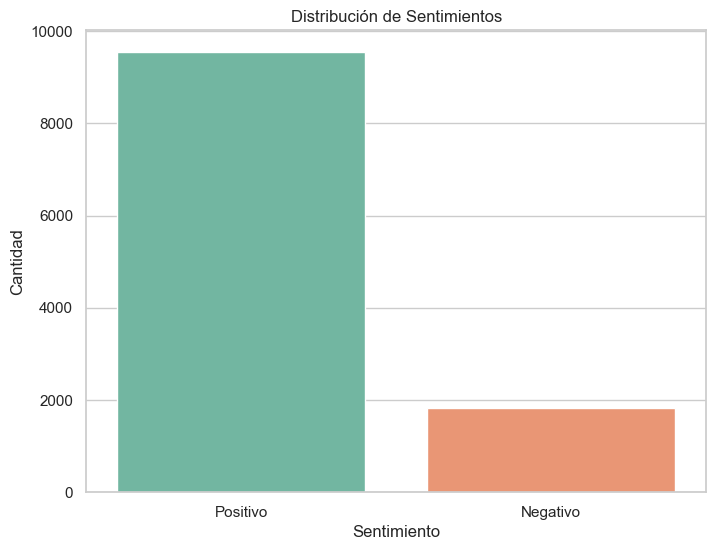

In [56]:
# Crear un gráfico de barras del campo "sentimiento"
plt.figure(figsize=(8, 6))
sns.set(style="whitegrid")
sns.countplot(data=grouped_dfinal, x="sentimiento_1", palette="Set2")

plt.title("Distribución de Sentimientos")
plt.xlabel("Sentimiento")
plt.ylabel("Cantidad")
plt.show()

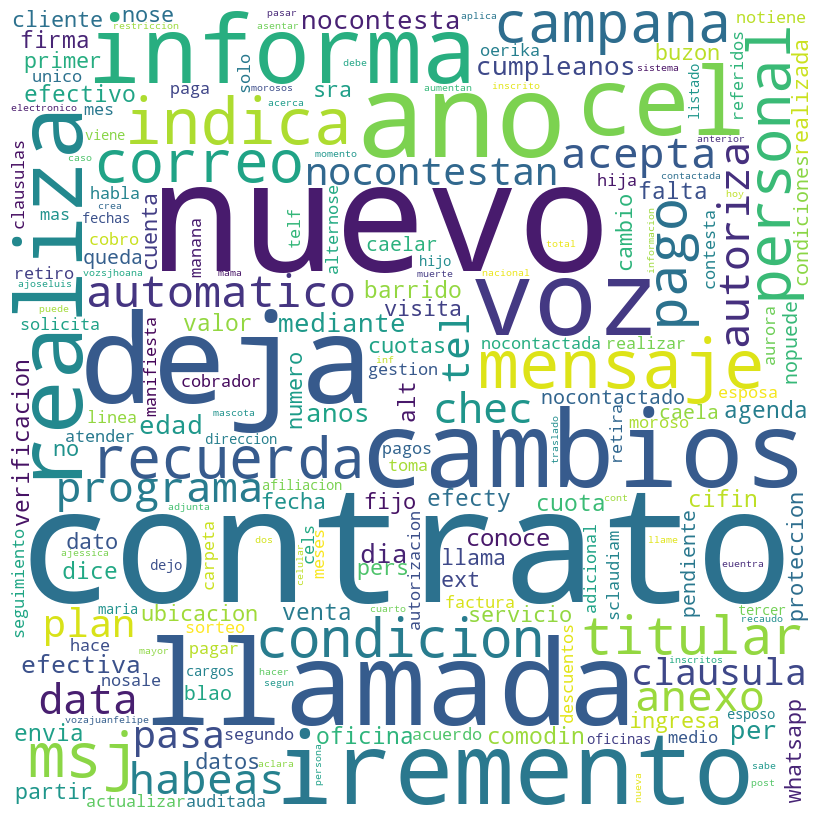

In [57]:
from collections import Counter
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Obtén todos los trigramas de tu DataFrame
all_trigrams = [trigram for trigrams in data_prueba["observacion_filtrada"] for trigram in trigrams]

# Cuenta la frecuencia de los trigramas
trigram_freq = Counter(all_trigrams)

# Crea una nube de palabras con los trigramas más frecuentes
wordcloud = WordCloud(width=800, height=800, background_color="white").generate_from_frequencies(trigram_freq)

# Muestra la nube de palabras
plt.figure(figsize=(8, 8), facecolor=None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

In [61]:
df2a.head(1)

,CodigoPrograma,observacion_sin_nombres,fecha,neg,neu,pos,compound,observacion_no,observacion_minuscula,observacion_filtrada,sin_stopwords,lemmatization,stemming
103,84,el papa de la dice que despues del que les p...,2022-04-06,0.0,1.0,0.0,0.0,el papa de la dice que despues del que les p...,el papa de la dice que despues del que les p...,"[papa, dice, despues, paguen, sueldo, pagan, n...","[papa, dice, despues, paguen, sueldo, pagan, n...","[papa, decir, despu, pagar, sueldo, pagar, num...","[pap, dic, despu, pag, sueld, pag, num, oficin..."


In [69]:
from nltk.util import ngrams
from nltk.tokenize import word_tokenize

# Función para identificar si un conjunto de palabras es un trigrama
def es_trigrama(trigram):
    return len(trigram) == 3

# Aplicar la función a cada fila del DataFrame
def identificar_trigramas(row):
    words = row['observacion_filtrada']
    trigrams = list(ngrams(words, 3))
    trigrams_identificados = [trigram for trigram in trigrams if es_trigrama(trigram)]
    return trigrams_identificados

# Aplicar la función a cada fila del DataFrame y agregar columnas
data_prueba1['trigramas_i'] = data_prueba1.progress_apply(identificar_trigramas, axis=1)
data_prueba1['es_trigrama'] = data_prueba1['trigramas_i'].apply(lambda trigrams: 'SI' if len(trigrams) > 0 else 'NO')

data_prueba1.head(1)



Processing Dataframe: 100%|██████████| 56879/56879 [00:00<00:00, 108786.85it/s]


,CodigoPrograma,observacion_sin_nombres,fecha,neg,neu,pos,compound,observacion_no,observacion_minuscula,observacion_filtrada,sin_stopwords,lemmatization,stemming,trigramas_i,es_trigrama
103,84,el papa de la dice que despues del que les p...,2022-04-06,0.0,1.0,0.0,0.0,el papa de la dice que despues del que les p...,el papa de la dice que despues del que les p...,"[papa, dice, despues, paguen, sueldo, pagan, n...","[papa, dice, despues, paguen, sueldo, pagan, n...","[papa, decir, despu, pagar, sueldo, pagar, num...","[pap, dic, despu, pag, sueld, pag, num, oficin...","[(papa, dice, despues), (dice, despues, paguen...",SI
